In [ ]:
#    GNU LESSER GENERAL PUBLIC LICENSE
#    Version 3, 29 June 2007
#    Copyright (C) 2007 Free Software Foundation, Inc. <http://fsf.org/>
#    Everyone is permitted to copy and distribute verbatim copies
#    of this license document, but changing it is not allowed.

#    James Gaboardi, 2016

# Network-based Cost Matrix Calculation: 
# `pgRouting` in a `Python` Environment with `SQLAlchemy`

----

----

## James D. Gaboardi &nbsp;&nbsp; |  &nbsp;&nbsp; Spatial Databases

----

### &nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;Spring 2016  &nbsp;&nbsp; &nbsp;|  &nbsp;&nbsp;&nbsp; Department of Geography 

----


In [1]:
import IPython.display as IPd

# Local path on user's machine
path = '/Users/jgaboardi/Dropbox/Spring_16/GEO5934.01_Spatial_Databases/Project/Data/'

# $\Longrightarrow$`SQLAlchemy`

http://docs.sqlalchemy.org/en/rel_1_0/core/tutorial.html

# $\Longrightarrow$`PySAL.Network` All Neighbors Shortest Path

# $\Longrightarrow$`pgRouting`

http://pgrouting.org

------------

---

# 1.

# SQLAlchemy

In [2]:
import sqlalchemy

In [3]:
print dir(sqlalchemy)

['BIGINT', 'BINARY', 'BLOB', 'BOOLEAN', 'BigInteger', 'Binary', 'Boolean', 'CHAR', 'CLOB', 'CheckConstraint', 'Column', 'ColumnDefault', 'Constraint', 'DATE', 'DATETIME', 'DDL', 'DECIMAL', 'Date', 'DateTime', 'DefaultClause', 'Enum', 'FLOAT', 'FetchedValue', 'Float', 'ForeignKey', 'ForeignKeyConstraint', 'INT', 'INTEGER', 'Index', 'Integer', 'Interval', 'LargeBinary', 'MetaData', 'NCHAR', 'NUMERIC', 'NVARCHAR', 'Numeric', 'PassiveDefault', 'PickleType', 'PrimaryKeyConstraint', 'REAL', 'SMALLINT', 'Sequence', 'SmallInteger', 'String', 'TEXT', 'TIME', 'TIMESTAMP', 'Table', 'Text', 'ThreadLocalMetaData', 'Time', 'TypeDecorator', 'Unicode', 'UnicodeText', 'UniqueConstraint', 'VARBINARY', 'VARCHAR', '__all__', '__builtins__', '__doc__', '__file__', '__go', '__name__', '__package__', '__path__', '__version__', 'alias', 'and_', 'asc', 'between', 'bindparam', 'case', 'cast', 'collate', 'column', 'cprocessors', 'create_engine', 'cresultproxy', 'cutils', 'delete', 'desc', 'dialects', 'distinct',

In [4]:
sqlalchemy.__version__

'1.0.12'

In [5]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:', echo=True)
engine

Engine(sqlite:///:memory:)

## Instantiate Tables

In [6]:
from sqlalchemy import Table, Column, Integer, String, MetaData, ForeignKey
metadata = MetaData()
users = Table('users', metadata,
     Column('id', Integer, primary_key=True),
     Column('name', String),
     Column('fullname', String), )

addresses = Table('addresses', metadata,
   Column('id', Integer, primary_key=True),
   Column('user_id', None, ForeignKey('users.id')),
   Column('email_address', String, nullable=False)  )

## `Users`

In [7]:
users

Table('users', MetaData(bind=None), Column('id', Integer(), table=<users>, primary_key=True, nullable=False), Column('name', String(), table=<users>), Column('fullname', String(), table=<users>), schema=None)

## `Addresses`

In [8]:
addresses

Table('addresses', MetaData(bind=None), Column('id', Integer(), table=<addresses>, primary_key=True, nullable=False), Column('user_id', Integer(), ForeignKey('users.id'), table=<addresses>), Column('email_address', String(), table=<addresses>, nullable=False), schema=None)

## Create Tables

In [9]:
metadata.create_all(engine)

2016-04-11 11:22:17,085 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2016-04-11 11:22:17,086 INFO sqlalchemy.engine.base.Engine ()
2016-04-11 11:22:17,088 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2016-04-11 11:22:17,089 INFO sqlalchemy.engine.base.Engine ()
2016-04-11 11:22:17,091 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("users")
2016-04-11 11:22:17,092 INFO sqlalchemy.engine.base.Engine ()
2016-04-11 11:22:17,093 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("addresses")
2016-04-11 11:22:17,093 INFO sqlalchemy.engine.base.Engine ()
2016-04-11 11:22:17,095 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE users (
	id INTEGER NOT NULL, 
	name VARCHAR, 
	fullname VARCHAR, 
	PRIMARY KEY (id)
)


2016-04-11 11:22:17,096 INFO sqlalchemy.engine.base.Engine ()
2016-04-11 11:22:17,097 INFO sqlalchemy.engine.base.Engine COMMIT
2016-04-11 11:22:17,099 INFO sqlalchemy.engine.b

In [10]:
ins = users.insert().values(name='james', fullname='James Gaboardi')
str(ins)

'INSERT INTO users (name, fullname) VALUES (:name, :fullname)'

In [11]:
ins.compile().params

{'fullname': 'James Gaboardi', 'name': 'james'}

## Connect to the Engine and Commit

In [12]:
conn = engine.connect()
result = conn.execute(ins)

2016-04-11 11:23:07,828 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, fullname) VALUES (?, ?)
2016-04-11 11:23:07,829 INFO sqlalchemy.engine.base.Engine ('james', 'James Gaboardi')
2016-04-11 11:23:07,830 INFO sqlalchemy.engine.base.Engine COMMIT


## Print Resulting Primary Key

In [13]:
ins.bind = engine
result.inserted_primary_key

[1]

## Insert and Commit New Record

In [14]:
conn.execute(ins, id=2, name='mabry', fullname='Mabry Gaboardi')

2016-04-11 11:23:32,018 INFO sqlalchemy.engine.base.Engine INSERT INTO users (id, name, fullname) VALUES (?, ?, ?)
2016-04-11 11:23:32,019 INFO sqlalchemy.engine.base.Engine (2, 'mabry', 'Mabry Gaboardi')
2016-04-11 11:23:32,021 INFO sqlalchemy.engine.base.Engine COMMIT


## Insert Email Addresses into `Addresses`

In [15]:
conn.execute(addresses.insert(), [
    {'user_id': 1, 'email_address' : 'jgaboardi@fsu.edu'},
    {'user_id': 1, 'email_address' : 'jgaboardi@gmail.com'},
    {'user_id': 2, 'email_address' : 'mabry.gaboardi@gmail.com'},
    {'user_id': 2, 'email_address' : 'gaboardm@tcc.fl.edu'}, ])

2016-04-11 11:23:58,723 INFO sqlalchemy.engine.base.Engine INSERT INTO addresses (user_id, email_address) VALUES (?, ?)
2016-04-11 11:23:58,725 INFO sqlalchemy.engine.base.Engine ((1, 'jgaboardi@fsu.edu'), (1, 'jgaboardi@gmail.com'), (2, 'mabry.gaboardi@gmail.com'), (2, 'gaboardm@tcc.fl.edu'))
2016-04-11 11:23:58,726 INFO sqlalchemy.engine.base.Engine COMMIT


## Connecting to the Database for Querying

In [16]:
from sqlalchemy.sql import select

s_u = select([users])
s_a = select([addresses])

result_u = conn.execute(s_u)
result_a = conn.execute(s_a)

2016-04-11 11:24:14,834 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.fullname 
FROM users
2016-04-11 11:24:14,836 INFO sqlalchemy.engine.base.Engine ()
2016-04-11 11:24:14,838 INFO sqlalchemy.engine.base.Engine SELECT addresses.id, addresses.user_id, addresses.email_address 
FROM addresses
2016-04-11 11:24:14,839 INFO sqlalchemy.engine.base.Engine ()


## Print Columns in `Users` and `Addresses`

In [17]:
print users.columns
for row in result_u:
    print '%s' % [row[i] for i in users.columns]

print addresses.columns
for row in result_a:
    print row

['users.id', 'users.name', 'users.fullname']
[1, u'james', u'James Gaboardi']
[2, u'mabry', u'Mabry Gaboardi']
['addresses.id', 'addresses.user_id', 'addresses.email_address']
(1, 1, u'jgaboardi@fsu.edu')
(2, 1, u'jgaboardi@gmail.com')
(3, 2, u'mabry.gaboardi@gmail.com')
(4, 2, u'gaboardm@tcc.fl.edu')


In [18]:
result_u = conn.execute(s_u)
row = result_u.fetchone()
print '\n', ("name:", row['name'], "; fullname:", row['fullname'])

2016-04-11 11:24:34,713 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.fullname 
FROM users
2016-04-11 11:24:34,714 INFO sqlalchemy.engine.base.Engine ()

('name:', u'james', '; fullname:', u'James Gaboardi')


In [19]:
row = result_u.fetchone()
print ("name:", row[1], "; fullname:", row[2])

('name:', u'mabry', '; fullname:', u'Mabry Gaboardi')


## Select Name & Full Name in `Users`

In [20]:
for row in conn.execute(s_u):
     print("name:", row[users.c.name], "; fullname:", row[users.c.fullname])

2016-04-11 11:25:05,632 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.fullname 
FROM users
2016-04-11 11:25:05,633 INFO sqlalchemy.engine.base.Engine ()
('name:', u'james', '; fullname:', u'James Gaboardi')
('name:', u'mabry', '; fullname:', u'Mabry Gaboardi')


## Select Email Address in `Address`

In [21]:
for row in conn.execute(s_a):
     print("email_address:", row[addresses.c.email_address])

2016-04-11 11:25:15,627 INFO sqlalchemy.engine.base.Engine SELECT addresses.id, addresses.user_id, addresses.email_address 
FROM addresses
2016-04-11 11:25:15,628 INFO sqlalchemy.engine.base.Engine ()
('email_address:', u'jgaboardi@fsu.edu')
('email_address:', u'jgaboardi@gmail.com')
('email_address:', u'mabry.gaboardi@gmail.com')
('email_address:', u'gaboardm@tcc.fl.edu')


In [22]:
result_u.close()
result_a.close()

## Full Join of  Tables

In [23]:
for row in conn.execute(select([users, addresses])):
     print(row)

2016-04-11 11:25:27,284 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.fullname, addresses.id, addresses.user_id, addresses.email_address 
FROM users, addresses
2016-04-11 11:25:27,286 INFO sqlalchemy.engine.base.Engine ()
(1, u'james', u'James Gaboardi', 1, 1, u'jgaboardi@fsu.edu')
(1, u'james', u'James Gaboardi', 2, 1, u'jgaboardi@gmail.com')
(1, u'james', u'James Gaboardi', 3, 2, u'mabry.gaboardi@gmail.com')
(1, u'james', u'James Gaboardi', 4, 2, u'gaboardm@tcc.fl.edu')
(2, u'mabry', u'Mabry Gaboardi', 1, 1, u'jgaboardi@fsu.edu')
(2, u'mabry', u'Mabry Gaboardi', 2, 1, u'jgaboardi@gmail.com')
(2, u'mabry', u'Mabry Gaboardi', 3, 2, u'mabry.gaboardi@gmail.com')
(2, u'mabry', u'Mabry Gaboardi', 4, 2, u'gaboardm@tcc.fl.edu')


## Inner Join

In [24]:
s = select([users, addresses]).where(users.c.id == addresses.c.user_id)
for row in conn.execute(s):
     print(row)

2016-04-11 11:25:40,135 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.fullname, addresses.id, addresses.user_id, addresses.email_address 
FROM users, addresses 
WHERE users.id = addresses.user_id
2016-04-11 11:25:40,136 INFO sqlalchemy.engine.base.Engine ()
(1, u'james', u'James Gaboardi', 1, 1, u'jgaboardi@fsu.edu')
(1, u'james', u'James Gaboardi', 2, 1, u'jgaboardi@gmail.com')
(2, u'mabry', u'Mabry Gaboardi', 3, 2, u'mabry.gaboardi@gmail.com')
(2, u'mabry', u'Mabry Gaboardi', 4, 2, u'gaboardm@tcc.fl.edu')


## Example Query

In [25]:
from sqlalchemy.sql import and_, or_, not_
print(and_(
         users.c.name.like('j%'),
         users.c.id == addresses.c.user_id,
         or_(
              addresses.c.email_address == 'jgaboardi@fsu.edu',
              addresses.c.email_address == 'gaboardm@tcc.fl.edu'
         ),
         not_(users.c.id > 5)
       )
  )

users.name LIKE :name_1 AND users.id = addresses.user_id AND (addresses.email_address = :email_address_1 OR addresses.email_address = :email_address_2) AND users.id <= :id_1


## Another Query

In [26]:
s = select([(users.c.fullname +
               ", " + addresses.c.email_address).
                label('title')]).\
        where(
           and_(
               users.c.id == addresses.c.user_id,
               users.c.name.between('h', 'n'),
               or_(
                  addresses.c.email_address.like('%@fsu.edu'),
                  addresses.c.email_address.like('%@tcc.fl.edu')
               )
           )
        )
_and_ = conn.execute(s).fetchall()
_and_

2016-04-11 11:26:25,205 INFO sqlalchemy.engine.base.Engine SELECT users.fullname || ? || addresses.email_address AS title 
FROM users, addresses 
WHERE users.id = addresses.user_id AND users.name BETWEEN ? AND ? AND (addresses.email_address LIKE ? OR addresses.email_address LIKE ?)
2016-04-11 11:26:25,206 INFO sqlalchemy.engine.base.Engine (', ', 'h', 'n', '%@fsu.edu', '%@tcc.fl.edu')


[(u'James Gaboardi, jgaboardi@fsu.edu',),
 (u'Mabry Gaboardi, gaboardm@tcc.fl.edu',)]

## Different Query, Same Result

In [27]:
s = select([(users.c.fullname +
               ", " + addresses.c.email_address).
                label('title')]).\
        where(users.c.id == addresses.c.user_id).\
        where(users.c.name.between('h', 'n')).\
        where(or_(
                  addresses.c.email_address.like('%@fsu.edu'),
                  addresses.c.email_address.like('%@tcc.fl.edu')
               )
           )      
_where_ = conn.execute(s).fetchall()
_where_

2016-04-11 11:26:51,264 INFO sqlalchemy.engine.base.Engine SELECT users.fullname || ? || addresses.email_address AS title 
FROM users, addresses 
WHERE users.id = addresses.user_id AND users.name BETWEEN ? AND ? AND (addresses.email_address LIKE ? OR addresses.email_address LIKE ?)
2016-04-11 11:26:51,265 INFO sqlalchemy.engine.base.Engine (', ', 'h', 'n', '%@fsu.edu', '%@tcc.fl.edu')


[(u'James Gaboardi, jgaboardi@fsu.edu',),
 (u'Mabry Gaboardi, gaboardm@tcc.fl.edu',)]

# Are these ==?

In [28]:
_and_ == _where_

True

---

# 2.

# `PySAL.Network`

## Gets bogged down with larger node-count networks

In [29]:
import pysal as ps
import geopandas as gpd
import numpy as np
import networkx as nx
import shapefile as shp
from shapely.geometry import Point
import shapely
from collections import OrderedDict
import pandas as pd
import qgrid
import gurobipy as gbp
import time

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

/Users/jgaboardi/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Data Creation & Manipulation

In [30]:
# Waverly  Hills
STREETS = gpd.read_file(path+'Waverly_Trim/Waverly.shp')
STREETS.to_crs(epsg=2779, inplace=True) # NAD83(HARN) / Florida North
STREETS.to_file(path+'WAVERLY/WAVERLY.shp')

ntw = ps.Network(path+'WAVERLY/WAVERLY.shp')  # Instantiate Topologically correct network
shp_W = ps.open(path+'WAVERLY/WAVERLY.shp')   # Instantiate .shp of network

buff = STREETS.buffer(200)  #Buffer 200 meters
buffU = buff.unary_union  #Buffer Union
buff1 = gpd.GeoSeries(buffU)
buff1.crs = STREETS.crs
Buff = gpd.GeoDataFrame(buff1, crs=STREETS.crs)
Buff.columns = ['geometry']

np.random.seed(352)
x = np.random.uniform(shp_W.bbox[0], shp_W.bbox[2], 1000)
np.random.seed(850)
y = np.random.uniform(shp_W.bbox[1], shp_W.bbox[3], 1000)  
coords0= zip(x,y)
coords = [shapely.geometry.Point(i) for i in coords0]
Rand = gpd.GeoDataFrame(coords)
Rand.crs = STREETS.crs
Rand.columns = ['geometry']

Inter = [Buff['geometry'].intersection(p) for p in Rand['geometry']]
INTER = gpd.GeoDataFrame(Inter, crs=STREETS.crs)
INTER.columns = ['geometry']

# Add records that are points within the buffer
point_in = []
for p in INTER['geometry']:
    if type(p) == shapely.geometry.point.Point:
        point_in.append(p)
point_in[:5]

CLIENT = gpd.GeoDataFrame(point_in[:100], crs=STREETS.crs)
CLIENT.columns = ['geometry']
SERVICE = gpd.GeoDataFrame(point_in[-15:], crs=STREETS.crs)
SERVICE.columns = ['geometry']
CLIENT.to_file(path+'CLIENT')
SERVICE.to_file(path+'SERVICE')

g = nx.Graph() # Roads & Nodes
g1 = nx.MultiGraph() # Edges and Vertices
GRAPH_client = nx.Graph() # Clients 
g_client = nx.Graph() # Snapped Clients
GRAPH_service = nx.Graph() # Service
g_service = nx.Graph() # Snapped Service

points_client = {} 
points_service = {}

CLI = ps.open(path+'CLIENT/CLIENT.shp')
for idx, coords in enumerate(CLI):
    GRAPH_client.add_node(idx)
    points_client[idx] = coords
    GRAPH_client.node[idx] = coords
    
SER = ps.open(path+'SERVICE/SERVICE.shp')
for idx, coords in enumerate(SER):
    GRAPH_service.add_node(idx)
    points_service[idx] = coords
    GRAPH_service.node[idx] = coords
    
# Client Weights for demand
np.random.seed(850)
Ai = np.random.randint(1, 5, len(CLI))
Ai = Ai.reshape(len(Ai),1)
AiSum = np.sum(Ai) # Sum of Weights (Total Demand)

client = shp.Writer(shp.POINT) # Client Shapefile
# Add Random Points
for i,j in CLI:
    client.point(i,j)
# Add Fields
client.field('client_ID')
client.field('Weight')
counter = 0
for i in range(len(CLI)):
    counter = counter + 1
    client.record('client_' + str(counter), Ai[i])
client.save(path+'Simulated/RandomPoints_CLIENT') # Save Shapefile 

service = shp.Writer(shp.POINT) #Service Shapefile
# Add Random Points
for i,j in SER:
    service.point(i,j)
# Add Fields
service.field('y_ID')
service.field('x_ID')
counter = 0
for i in range(len(SER)):
    counter = counter + 1
    service.record('y' + str(counter), 'x' + str(counter))
service.save(path+'Simulated/RandomPoints_SERVICE') # Save Shapefile 

# Snap
Snap_C = ntw.snapobservations(path+'Simulated/RandomPoints_CLIENT.shp', 
                     'Rand_Points_CLIENT', attribute=True)
Snap_S = ntw.snapobservations(path+'Simulated/RandomPoints_SERVICE.shp', 
                     'Rand_Points_SERVICE', attribute=True)

# Create Lat & Lon lists of the snapped service locations
y_snapped = []
x_snapped = []
for i,j in ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates.iteritems():
    y_snapped.append(j[0]) 
    x_snapped.append(j[1])
    
service_SNAP = shp.Writer(shp.POINT) # Snapped Service Shapefile
# Add Points
for i,j in ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates.iteritems():
    service_SNAP.point(j[0],j[1])
# Add Fields
service_SNAP.field('y_ID')
service_SNAP.field('x_ID')
service_SNAP.field('LAT')
service_SNAP.field('LON')
counter = 0
for i in range(len(ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates)):
    counter = counter + 1
    service_SNAP.record('y' + str(counter), 'x' + str(counter), y_snapped[i], x_snapped[i])
service_SNAP.save(path+'Snapped/SERVICE_Snapped') # Save Shapefile 

# What was just created...

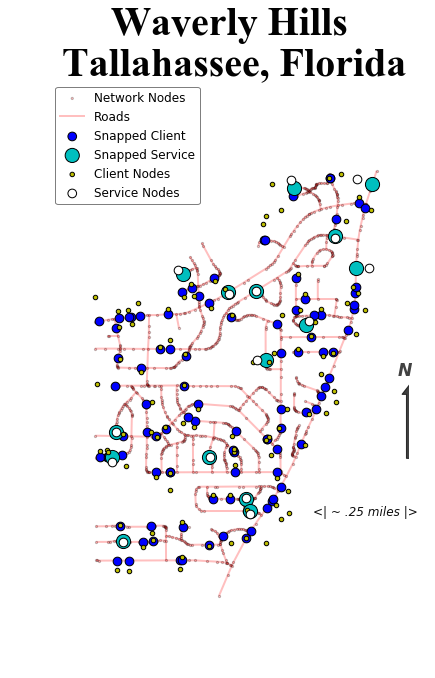

In [31]:
mpl.rcParams['figure.figsize']=5,8
# Draw Graph of Roads
for e in ntw.edges:
    g.add_edge(*e)
nx.draw(g, ntw.node_coords, node_size=5, alpha=0.25, edge_color='r', width=2)

# Draw Graph of Snapped Client Nodes
g_client = nx.Graph()
for p,coords in ntw.pointpatterns['Rand_Points_CLIENT'].snapped_coordinates.iteritems():
    g_client.add_node(p)
    g_client.node[p] = coords
nx.draw(g_client, ntw.pointpatterns['Rand_Points_CLIENT'].snapped_coordinates, 
        node_size=75, alpha=1, node_color='b')

# Draw Graph of Snapped Service Nodes
g_service = nx.Graph()
for p,coords in ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates.iteritems():
    g_service.add_node(p)
    g_service.node[p] = coords
nx.draw(g_service, ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates, 
        node_size=200, alpha=1, node_color='c')

# Draw Graph of Random Client Points
nx.draw(GRAPH_client, points_client, 
    node_size=20, alpha=1, node_color='y')

# Draw Graph of Random Service Points
nx.draw(GRAPH_service, points_service, 
    node_size=75, alpha=1, node_color='w')

# Legend (Ordered Dictionary)
LEGEND = OrderedDict()
LEGEND['Network Nodes']=g
LEGEND['Roads']=g
LEGEND['Snapped Client']=g_client
LEGEND['Snapped Service']=g_service
LEGEND['Client Nodes']=GRAPH_client
LEGEND['Service Nodes']=GRAPH_service
plt.legend(LEGEND, loc='upper left', fancybox=True, framealpha=0.5, scatterpoints=1)

# Title
plt.title('Waverly Hills\n Tallahassee, Florida', family='Times New Roman', 
      size=40, color='k', backgroundcolor='w', weight='bold')

# Must be changed for different spatial resolutions, etc.
plt.arrow(624000, 164050, 0.0, 500, width=50, head_width=125, 
          head_length=75, fc='k', ec='k',alpha=0.75,)
plt.annotate('N', xy=(623900, 164700), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)
plt.annotate('<| ~ .25 miles |>', xy=(623200, 163600), 
             fontstyle='italic', fontsize='large', alpha=0.95)

plt.show()

---

## The point of this project... Calculating a Shortest Path Matrix

---

In [32]:
t1_cs = time.time()

# Client to Service Matrix Function
All_Neigh_Dist = ntw.allneighbordistances(
                sourcepattern=ntw.pointpatterns['Rand_Points_CLIENT'],
                destpattern=ntw.pointpatterns['Rand_Points_SERVICE']) # in meters

All_Dist_MILES = All_Neigh_Dist * 0.000621371 # to miles

t2 = time.time() - t1_cs
print t2

7.03834295273


---

## How about a Larger Network?

---

In [33]:
# Waverly  Hills
STREETS = gpd.read_file(path+'Waverly_Area/Waverly_Area.shp')
STREETS.to_crs(epsg=2779, inplace=True) # NAD83(HARN) / Florida North
STREETS.to_file(path+'WAVERLY/WAVERLY.shp')

ntw = ps.Network(path+'WAVERLY/WAVERLY.shp')  # Instantiate Topologically correct network
shp_W = ps.open(path+'WAVERLY/WAVERLY.shp')   # Instantiate .shp of network

buff = STREETS.buffer(200)  #Buffer 200 meters
buffU = buff.unary_union  #Buffer Union
buff1 = gpd.GeoSeries(buffU)
buff1.crs = STREETS.crs
Buff = gpd.GeoDataFrame(buff1, crs=STREETS.crs)
Buff.columns = ['geometry']

np.random.seed(352)
x = np.random.uniform(shp_W.bbox[0], shp_W.bbox[2], 1000)
np.random.seed(850)
y = np.random.uniform(shp_W.bbox[1], shp_W.bbox[3], 1000)  
coords0= zip(x,y)
coords = [shapely.geometry.Point(i) for i in coords0]
Rand = gpd.GeoDataFrame(coords)
Rand.crs = STREETS.crs
Rand.columns = ['geometry']

Inter = [Buff['geometry'].intersection(p) for p in Rand['geometry']]
INTER = gpd.GeoDataFrame(Inter, crs=STREETS.crs)
INTER.columns = ['geometry']

# Add records that are points within the buffer
point_in = []
for p in INTER['geometry']:
    if type(p) == shapely.geometry.point.Point:
        point_in.append(p)
point_in[:5]

CLIENT = gpd.GeoDataFrame(point_in[:100], crs=STREETS.crs)
CLIENT.columns = ['geometry']
SERVICE = gpd.GeoDataFrame(point_in[-15:], crs=STREETS.crs)
SERVICE.columns = ['geometry']
CLIENT.to_file(path+'CLIENT')
SERVICE.to_file(path+'SERVICE')

g = nx.Graph() # Roads & Nodes
g1 = nx.MultiGraph() # Edges and Vertices
GRAPH_client = nx.Graph() # Clients 
g_client = nx.Graph() # Snapped Clients
GRAPH_service = nx.Graph() # Service
g_service = nx.Graph() # Snapped Service

points_client = {} 
points_service = {}

CLI = ps.open(path+'CLIENT/CLIENT.shp')
for idx, coords in enumerate(CLI):
    GRAPH_client.add_node(idx)
    points_client[idx] = coords
    GRAPH_client.node[idx] = coords
    
SER = ps.open(path+'SERVICE/SERVICE.shp')
for idx, coords in enumerate(SER):
    GRAPH_service.add_node(idx)
    points_service[idx] = coords
    GRAPH_service.node[idx] = coords
    
# Client Weights for demand
np.random.seed(850)
Ai = np.random.randint(1, 5, len(CLI))
Ai = Ai.reshape(len(Ai),1)
AiSum = np.sum(Ai) # Sum of Weights (Total Demand)

client = shp.Writer(shp.POINT) # Client Shapefile
# Add Random Points
for i,j in CLI:
    client.point(i,j)
# Add Fields
client.field('client_ID')
client.field('Weight')
counter = 0
for i in range(len(CLI)):
    counter = counter + 1
    client.record('client_' + str(counter), Ai[i])
client.save(path+'Simulated/RandomPoints_CLIENT') # Save Shapefile 

service = shp.Writer(shp.POINT) #Service Shapefile
# Add Random Points
for i,j in SER:
    service.point(i,j)
# Add Fields
service.field('y_ID')
service.field('x_ID')
counter = 0
for i in range(len(SER)):
    counter = counter + 1
    service.record('y' + str(counter), 'x' + str(counter))
service.save(path+'Simulated/RandomPoints_SERVICE') # Save Shapefile 

# Snap
Snap_C = ntw.snapobservations(path+'Simulated/RandomPoints_CLIENT.shp', 
                     'Rand_Points_CLIENT', attribute=True)
Snap_S = ntw.snapobservations(path+'Simulated/RandomPoints_SERVICE.shp', 
                     'Rand_Points_SERVICE', attribute=True)

# Create Lat & Lon lists of the snapped service locations
y_snapped = []
x_snapped = []
for i,j in ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates.iteritems():
    y_snapped.append(j[0]) 
    x_snapped.append(j[1])
    
service_SNAP = shp.Writer(shp.POINT) # Snapped Service Shapefile
# Add Points
for i,j in ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates.iteritems():
    service_SNAP.point(j[0],j[1])
# Add Fields
service_SNAP.field('y_ID')
service_SNAP.field('x_ID')
service_SNAP.field('LAT')
service_SNAP.field('LON')
counter = 0
for i in range(len(ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates)):
    counter = counter + 1
    service_SNAP.record('y' + str(counter), 'x' + str(counter), y_snapped[i], x_snapped[i])
service_SNAP.save(path+'Snapped/SERVICE_Snapped') # Save Shapefile 

## Larger Area Network

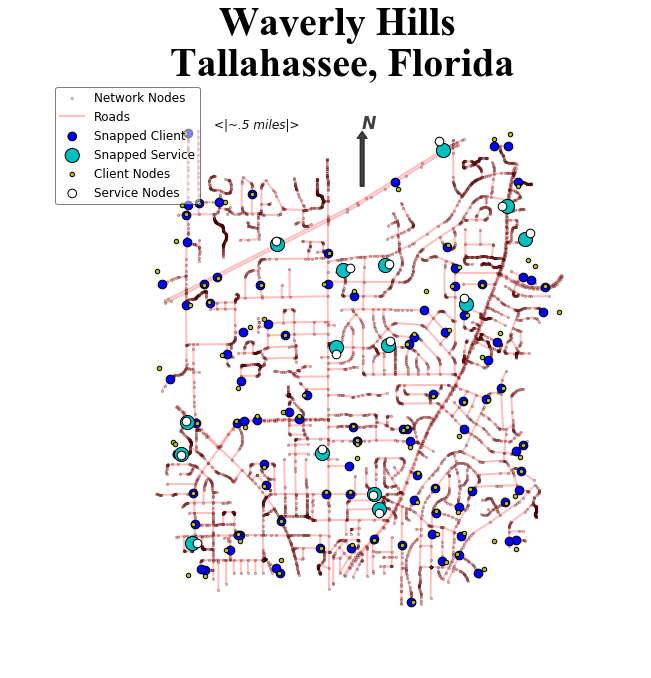

In [34]:
mpl.rcParams['figure.figsize']=8,8
# Draw Graph of Roads
for e in ntw.edges:
    g.add_edge(*e)
nx.draw(g, ntw.node_coords, node_size=5, alpha=0.25, edge_color='r', width=2)

# Draw Graph of Snapped Client Nodes
g_client = nx.Graph()
for p,coords in ntw.pointpatterns['Rand_Points_CLIENT'].snapped_coordinates.iteritems():
    g_client.add_node(p)
    g_client.node[p] = coords
nx.draw(g_client, ntw.pointpatterns['Rand_Points_CLIENT'].snapped_coordinates, 
        node_size=75, alpha=1, node_color='b')

# Draw Graph of Snapped Service Nodes
g_service = nx.Graph()
for p,coords in ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates.iteritems():
    g_service.add_node(p)
    g_service.node[p] = coords
nx.draw(g_service, ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates, 
        node_size=200, alpha=1, node_color='c')

# Draw Graph of Random Client Points
nx.draw(GRAPH_client, points_client, 
    node_size=20, alpha=1, node_color='y')

# Draw Graph of Random Service Points
nx.draw(GRAPH_service, points_service, 
    node_size=75, alpha=1, node_color='w')

# Legend (Ordered Dictionary)
LEGEND = OrderedDict()
LEGEND['Network Nodes']=g
LEGEND['Roads']=g
LEGEND['Snapped Client']=g_client
LEGEND['Snapped Service']=g_service
LEGEND['Client Nodes']=GRAPH_client
LEGEND['Service Nodes']=GRAPH_service
plt.legend(LEGEND, loc='upper left', fancybox=True, framealpha=0.5, scatterpoints=1)

# Title
plt.title('Waverly Hills\n Tallahassee, Florida', family='Times New Roman', 
      size=40, color='k', backgroundcolor='w', weight='bold')

# Must be changed for different spatial resolutions, etc.
plt.arrow(621800, 165900, 0.0, 500, width=50, head_width=125, 
          head_length=75, fc='k', ec='k',alpha=0.75,)
plt.annotate('N', xy=(621800, 166500), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)
plt.annotate('<|~.5 miles|>', xy=(620000, 166500), 
             fontstyle='italic', fontsize='large', alpha=0.95)

plt.show()

## Larger Shortest Path Matrix

In [35]:
t3_cs = time.time()

# Client to Service Matrix Function
All_Neigh_Dist = ntw.allneighbordistances(
                sourcepattern=ntw.pointpatterns['Rand_Points_CLIENT'],
                destpattern=ntw.pointpatterns['Rand_Points_SERVICE']) # in meters

All_Dist_MILES = All_Neigh_Dist * 0.000621371 # to miles

t4 = time.time() - t3_cs
print t4

180.975471973


# Time Comparision using `PySAL.Network`

In [36]:
print 'First network Djikstra calc. time:  ', t2
print 'Second network Djikstra calc. time: ', t4

First network Djikstra calc. time:   7.03834295273
Second network Djikstra calc. time:  180.975471973


## Difference in .shp files

In [37]:
dbf_Ws = ps.open(path+'Waverly_Trim/Waverly.dbf')
dbf_Wl = ps.open(path+'Waverly_Area/Waverly_Area.dbf')

print dbf_Ws.n_records
print dbf_Wl.n_records

78
917


## Sample Record

In [38]:
for i in range(dbf_Wl.n_records):
    print dbf_Wl.read_record(i)
    length = dbf_Wl.read_record(i)[10] # miles
    print '\nlength: ', length
    speed = dbf_Wl.read_record(i)[32]  # mph
    print 'speed: ', speed
    travel_time = (length / speed) * 60
    print 'travel time: ', travel_time, 'minutes @ ', speed, 'mph'
    break

[36625.0, u'DOP2008TFC', 0.0, 0.0, 0.0, 0.0, u'', u'THOMASVILLE', u'RD', u'', 0.00752197, u'THOMASVILLE RD', 8, 5, 2, u'STATE', u'', datetime.date(2014, 2, 26), u'', u'', u'HAGESETHC', u'N', u'CONN', u'', u'O', u'BUILT', None, u'SR - 61', u'', u'TALLAHASSEE', u'TALLAHASSEE', u'LEON', 5, 0.09026364, 0.09026364, 0, 0, u'O', 39.71603061, u'', u'61', u'', u'', u'', 39.7160306136]

length:  0.00752197
speed:  5
travel time:  0.09026364 minutes @  5 mph


---------

# 3. 

## So...

----

-  What is the calculation time trade-off between `PySAL.Network` and `pgRouting` for cost matrix creation?
-  Can this be automated with `SQLAlchemy` in `Python`?
-  Should another `Python` package be used to interface with `pgRouting`?
    - `psycopg2`
    - `postgis`
    - `etc`...
    
- ... Or... would my time be better spent doing this manually with `pgRouting`...?

----------

# Thank you

---------

----